In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("BearCreek_precipitation_flow.csv")

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['rolling_avg'] = df['Streamflow (cubic feet per second)'].rolling(window=30, center=True).mean()
df['Streamflow (cubic feet per second)'] = pd.to_numeric(df['Streamflow (cubic feet per second)'], errors='coerce')
df['baseflow'] = df['Streamflow (cubic feet per second)'] - df['rolling_avg']
df.dropna(inplace=True)

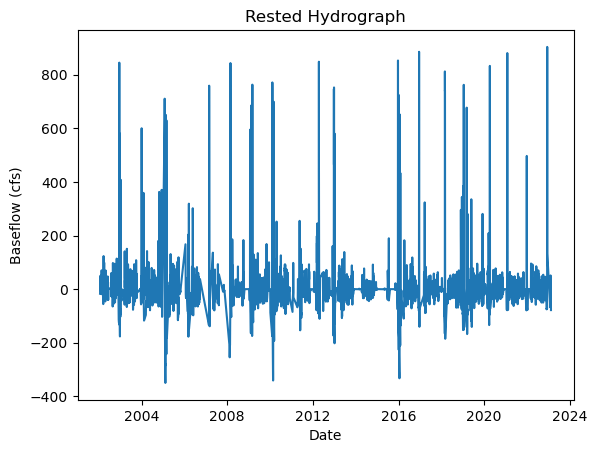

In [20]:
plt.plot(df['date'], df['baseflow'])
plt.xlabel('Date')
plt.ylabel('Baseflow (cfs)')
plt.title('Rested Hydrograph')
plt.show()

Rested Hydrograph:
Also known as a baseflow hydrograph, is a graph that represents the natural flow of a river or stream after all the stormwater runoff has been fully routed through the system and only the baseflow remains. The baseflow is the portion of the streamflow that is derived from groundwater seeping into the river channel.

To create a rested hydrograph, the first step is to isolate the baseflow component from the total streamflow. This can be done by subtracting the stormwater runoff component (which is typically higher during storm events) from the total streamflow.

The value of 0 on the y-axis could represent the baseline flow of the river or stream, which is the minimum flow that occurs when there is no stormwater runoff. The values above 0 on the y-axis would then represent the additional flow that occurs during storm events or other precipitation events.

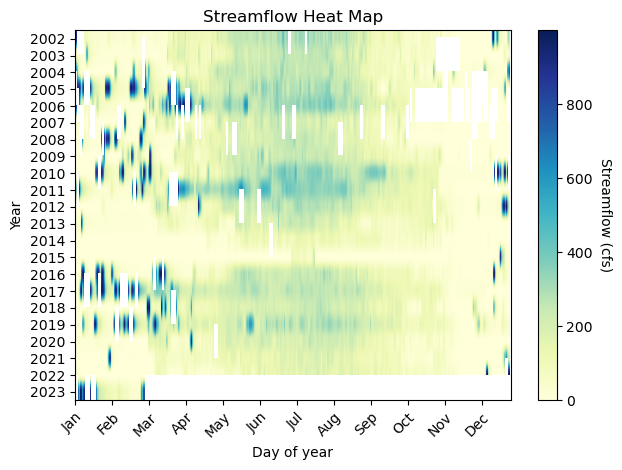

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('BearCreek_precipitation_flow.csv')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a pivot table to organize streamflow data by year and day of year
pivot_table = pd.pivot_table(df, values='Streamflow (cubic feet per second)', index=df['date'].dt.year, columns=df['date'].dt.dayofyear)

# Create heatmap of streamflow data
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='YlGnBu', aspect='auto')

# Set axis labels and tick marks
ax.set_xlabel('Day of year')
ax.set_ylabel('Year')
ax.set_xticks(np.arange(0, 365, 31))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)

# Rotate the tick labels and set the colorbar
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Streamflow (cfs)', rotation=-90, va="bottom")

# Set the title and display the plot
ax.set_title('Streamflow Heat Map')
fig.tight_layout()
plt.show()